# Week home work

In [106]:
# Loading the dataset
#!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

In [46]:
import pandas as pd
import numpy as np

In [51]:
#Reading the data set
df = pd.read_csv("laptops.csv")

In [52]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [53]:
# Normalize the names of the columns
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [54]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [55]:
# Columns to be used
df = df[['ram', 'storage', 'screen', 'final_price']]

In [56]:
# Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='final_price', ylabel='Count'>

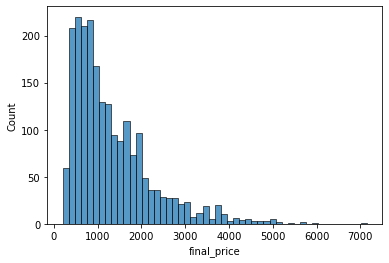

In [57]:
sns.histplot(df.final_price, bins=50)

In [58]:
# Identifying missing values
df.isna().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [59]:
# Summary statistics
df.describe()

,ram,storage,screen,final_price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


### Prepare and split the dataset

In [60]:
# Setting up validation framework
n = len(df)
n

2160

In [119]:
n_val, n_test, n_train

(432, 432, 1296)

In [62]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [63]:
df_val.isna().sum()

ram            0
storage        0
screen         1
final_price    0
dtype: int64

In [64]:
#reset index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [65]:
# train data
y_train_orig = df_train.final_price.values
y_val_orig = df_val.final_price.values
y_test_orig = df_test.final_price.values

y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

In [66]:
# Asigning the target varriable
del df_train["final_price"]
del df_val["final_price"]
del df_test["final_price"]

In [67]:
df_train

,ram,storage,screen
0,32,1000,15.6
1,4,64,14.1
2,32,1000,14.0
3,16,512,13.3
4,32,1000,16.0
...,...,...,...
1291,8,256,14.0
1292,32,1000,16.0
1293,16,512,15.6
1294,16,512,14.0


- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)

In [71]:
# filling the missing values with zeros
X_train = df_train
X_train["screen"] = df_train["screen"].fillna(0).values
X_train_zero = X_train.values
# filling the missing values with mean
#X_train_mean = df_train["screen"].fillna(df["screen"].mean()).values

In [73]:
X_train_zero.shape

(1296, 3)

In [94]:
X_train["screen"] = df_train["screen"].fillna(df["screen"].mean()).values
X_train_mean = X_train.values

In [95]:
# Linear regression model
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [45]:
X_train_zero

array([15.6, 14.1, 14. , ..., 15.6, 14. , 14. ])

In [96]:
w0, w = train_linear_regression(X_train_mean, y_train)

In [97]:
w

array([ 0.02630589,  0.00066041, -0.03651909])

In [98]:
# Getting predictions
y_pred = w0 + X_train.dot(w)

In [103]:
# creating a function that would prepare the data, filing missing values with zero
def prepare_X(df):
    df_num = df
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [99]:
# RMSE
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [101]:
round(rmse(y_train, y_pred),2)

0.45

In [104]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.4288635315474401

In [102]:
# filling the missing values with zeros
X_train = df_train.fillna(0).values

In [106]:
# Applying regularization the linear equation
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

#### Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].

In [111]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    #X_train = prepare_X(df_train)
    
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    print(r, w0, round(score, 5))

0 6.72716370611495 0.42886
0.01 6.721004333262884 0.42885
0.1 6.666075503830106 0.42878
1 6.162616499462912 0.43059
5 4.616086176498063 0.46321
10 3.51675472079387 0.50757
100 0.6849263362658967 0.6735


- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.

In [113]:
np.random.seed(9)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()


# train data
y_train_orig = df_train.final_price.values
y_val_orig = df_val.final_price.values
y_test_orig = df_test.final_price.values

y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

#reset index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


# Asigning the target varriable
del df_train["final_price"]
del df_val["final_price"]
del df_test["final_price"]

# creating a function that would prepare the data, filing missing values with zero
def prepare_X(df):
    df_num = df
    df_num = df_num.fillna(0)
    X = df_num.values
    return X


# Applying regularization the linear equation
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]


X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.40840334262399014

<AxesSubplot:ylabel='Count'>

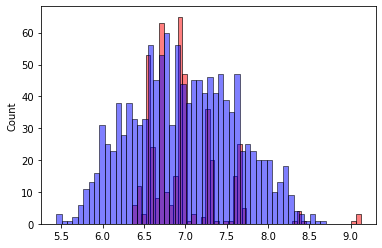

In [114]:
# Plotting the target against the predicted values
sns.histplot(y_pred, color="red", alpha=0.5, bins=50)
sns.histplot(y_train, color="blue", alpha=0.5, bins=50)